In [1]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import json

## Easy
1. How many unique customers are in the dataset?

In [2]:
filename = "dim_customer.json"

#load to dataframe

customers_df = pd.read_json(filename)
print(customers_df.columns)

Index(['age', 'first_name', 'gender', 'id', 'last_name'], dtype='object')


In [3]:
print(customers_df.dtypes)

age           float64
first_name     object
gender         object
id              int64
last_name      object
dtype: object


In [5]:
# to get the unique customer, in case there are similar names we should add the first and last names

customers_df["full_name"] = customers_df["first_name"].astype(str) + " " + customers_df["last_name"].astype(str)

unique_customers_count = customers_df["full_name"].unique().size
print(f"There are {unique_customers_count} unique customer names")

#This means that there are customers with the different customer_id but repeated 

There are 4992 unique customer names


In [6]:
# to get the unique customer, in case there are similar names we should add the first and last names
unique_customers_count = customers_df["id"].unique().size
print(f"There are {unique_customers_count} unique IDs")

#This means that there are customers with the different customer_id but repeated 


There are 5191 unique IDs


2. What are the different categories of products available? How many unique categories are there?

In [7]:
filename = "fct_invoice.csv"

fct_df = pd.read_csv(filename)

#dump
fct_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [8]:
unique_categories = fct_df["category"].unique()
print("There different categories are", end=" ")

for category in unique_categories:
    print(category, end=",")

unique_count = unique_categories.size

print(" ")
print(f"There are {unique_count} categories")

There different categories are Clothing,Shoes,Books,Cosmetics,Food & Beverage,Toys,Technology,Souvenir, 
There are 8 categories


3. Which payment method is the most popular? How many times was it used?

In [9]:
payment_gb = fct_df.groupby("payment_method") # this first one groups
payment_gb["payment_method"].count().sort_values(ascending=False).head(1) #and then counts how many are in the group

payment_method
Cash    44447
Name: payment_method, dtype: int64

# Medium

1. What are the three most popular categories, by total sales?
* total sales is the price of all goods sold

In [10]:
fct_df["total_sale"] = fct_df["quantity"] * fct_df["price"]
fct_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sale
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [11]:
popular_category_df = fct_df.loc[:,["total_sale","category"]].groupby("category").sum().sort_values(by="total_sale",ascending=False).head(3)
print(popular_category_df)

              total_sale
category                
Clothing    1.139968e+08
Shoes       6.655345e+07
Technology  5.786235e+07


2. What are the total sales attributed to customers over the age of 45?
* https://stackoverflow.com/questions/53645882/pandas-merging-101 

In [12]:
customers_df.rename(columns={'id': 'customer_id'}, inplace=True) #make them have the same naming convention to make it easier to merge

In [13]:
merged_df = customers_df.merge(fct_df, on='customer_id', how='inner')

#Checking the order
merged_df.loc[merged_df["age"] > 45,:].sort_values(by="age", ascending=True).head(5) 

,age,first_name,gender,customer_id,last_name,full_name,invoice_no,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sale
78391,46.0,Justin,M,1550,Petty,Justin Petty,I321920,Clothing,4,1200.32,Cash,8/6/2021,Mall of Istanbul,4801.28
97019,46.0,Kristina,F,3709,Green,Kristina Green,I279013,Food & Beverage,1,5.23,Credit Card,20/11/2022,Kanyon,5.23
98324,46.0,Lisa,F,4508,Moore,Lisa Moore,I239908,Toys,5,179.20,Cash,22/02/2023,Metropol AVM,896.00
98323,46.0,Lisa,F,4508,Moore,Lisa Moore,I190479,Shoes,1,600.17,Cash,17/05/2022,Viaport Outlet,600.17
24925,46.0,Jennifer,F,286,Ford,Jennifer Ford,I310784,Clothing,1,300.08,Debit Card,24/02/2023,Cevahir AVM,300.08


In [14]:
over_45 = round(merged_df.loc[merged_df["age"] > 45,"total_sale"].sum(),2)
print(over_45)

82039768.15


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [15]:
fct_df["invoice_date"] = pd.to_datetime(fct_df["invoice_date"], dayfirst=True, errors="coerce")

In [16]:
sales_date_df = fct_df.loc[:,["total_sale","invoice_date"]].groupby("invoice_date").sum()
sales_date_df

,total_sale
invoice_date,
2021-01-01,271192.66
2021-01-02,303659.14
2021-01-03,375794.99
2021-01-04,284512.26
2021-01-05,308395.08
...,...
2023-03-04,402423.09
2023-03-05,305423.09
2023-03-06,442091.99


In [17]:
print(fct_df["invoice_date"].dtype)

datetime64[ns]


Text(0.5, 1.0, 'Sales over time')

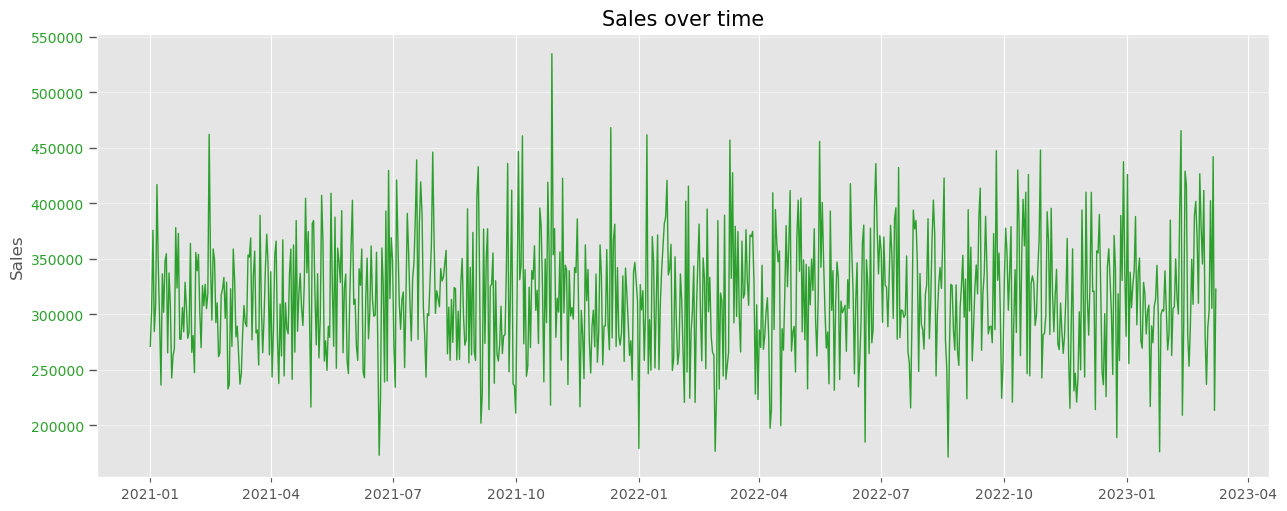

In [18]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [13,5]

data_ax1 = sales_date_df.total_sale
fig, ax1 = plt.subplots()
        
ax1.set_ylabel('Sales')
ax1.plot(data_ax1, color = 'tab:green', linewidth= 1)
ax1.tick_params(axis = 'y',
                labelcolor= 'tab:green',
                length = 6, 
                width = 1, 
                grid_alpha=0.5)
    
fig.tight_layout()
plt.title("Sales over time", fontsize = 15)

## Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
* https://stackoverflow.com/questions/47152691/how-can-i-pivot-a-dataframe

In [19]:
merged_df.loc[:,["age"]].sort_values(by="age", ascending=False).head(5)
#now I know the oldest age is 85

,age
99454,85.0
20120,85.0
78366,85.0
78365,85.0
78364,85.0


In [20]:
#Understanding:  the number of sale per category in a given age range, 
#First add an additional column to make it easier to identify those that fit in the age range
def age_group(age):
     if 0 <= age <= 19:
        return "10-19"
     elif 20 <= age <= 29:
        return "20-29"
     elif 30 <= age <= 39:
        return "30-39"
     elif 40 <= age <=  49:
        return "40-49"
     elif 50 <= age <=  59:
        return "50-59"
     elif 60 <= age <=  69:
        return "60-69"
     elif 70 <= age <=  79:
        return "70-79"
     elif 80 <= age <=  89:
        return "80-89"
     else:
        return "NA"
#will use the existing merged_df for this
merged_df["age_range"] = merged_df["age"].apply(age_group)

In [21]:
merged_df.pivot_table(values="total_sale", index="age_range", columns="category", aggfunc="sum")

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_range,,,,,,,,
10-19,12801.75,1927413.84,109619.36,13582.31,993281.35,12375.15,1129800.0,60426.24
20-29,79461.75,10250732.80,605915.32,73491.96,5924878.24,54943.32,5261550.0,385100.80
30-39,84143.10,11354126.96,723544.70,87246.86,7200839.66,64092.72,6159300.0,420582.40
40-49,87203.40,11215189.92,665034.96,89553.29,7025590.02,66391.80,5954550.0,390906.88
50-59,74962.20,10321851.76,587780.96,72425.04,5852857.84,54943.32,4435200.0,345067.52
60-69,80476.80,10660642.08,649990.76,80976.09,5978893.54,55025.43,5471550.0,363955.20
70-79,54827.85,7769371.28,419082.62,55050.98,4480269.05,38673.81,3638250.0,273244.16
80-89,26664.00,4493698.00,254531.60,31332.93,2628744.60,23718.06,1946700.0,153932.80
NA,334012.05,46003764.40,2777362.62,345875.59,26468097.17,265661.04,23865450.0,1587210.24
